<a href="https://colab.research.google.com/github/Canthey/Projet_mlops/blob/main/Rapport_d%E2%80%99analyse_exploratoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet MLOps pour les étudiants : Prédiction de prix immobiliers en Californie

## Objectif principal
Ce projet vise à introduire les étudiants à la gestion complète du cycle de vie d’un modèle de machine learning, en utilisant des outils modernes et une approche structurée MLOps. Les étapes couvriront la modélisation, la mise en production, et le suivi du modèle en production.

## Scénario
Vous travaillez en tant que Data Scientist/Machine Learning Engineer pour une entreprise immobilière fictive nommée "ImmoPrix". Votre mission est de développer un modèle capable de prédire le prix médian des maisons en Californie pour aider les agents à fixer des prix justes.

Les données sont issues du jeu de données *California Housing*. Voici les caractéristiques principales :
- **MedInc** : Revenu médian (en 10K $).
- **HouseAge** : Âge médian des maisons.
- **AveRooms** : Nombre moyen de pièces par logement.
- **AveBedrms** : Nombre moyen de chambres par logement.
- **Population** : Taille de la population dans le secteur.
- **AveOccup** : Occupation moyenne par maison.
- **Latitude** : Latitude.
- **Longitude** : Longitude.

L’objectif est de prédire **MedHouseVal**, le prix médian des maisons (en 100K $).




## Missions à réaliser

---

### Mission 1 : Exploration et préparation des données
- **Objectif** : Comprendre les données et les préparer pour la modélisation.
- **Tâches** :
  1. Charger les données et effectuer une analyse exploratoire.
  2. Identifier les valeurs manquantes ou aberrantes.
  3. Normaliser ou standardiser les données si nécessaire.
  4. Diviser les données en ensembles d’entérâinement et de test.


Pas de valeurs manquantes mais on remarque quelques données abérantes. Ces donées sont considérées come abérantes car le nombre de chambre est superieurs a 100 ou alors l'occupation moyenne est superieure a 100.
On a décidé de les supprimer du jeu de données car seulement 6 lignes
Elles seraient susceptibles de fausser les prédictions

In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.frame
filtered_data = data[(data['AveRooms'] > 100) | (data['AveOccup'] > 100)]

# Afficher les résultats filtrés
filtered_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500



---
### Mission 2 : Modélisation et tracking des expériences
- **Objectif** : Construire un modèle de régression et suivre les expériences avec MLflow.
- **Tâches** :
  1. Créer un modèle de régression linéaire comme baseline.
  2. Utiliser des modèles avancés comme Random Forest ou Gradient Boosting.
  3. Mettre en place MLflow pour suivre les expériences (métriques comme RMSE, MAE, R²).
  4. Enregistrer le meilleur modèle dans le *Model Registry* de MLflow.



On réalise trois modèles :
* train_linear_regression(X_train, X_test, y_train, y_test)
* train_gradient_boosting(X_train, X_test, y_train, y_test)
* train_random_forest(X_train, X_test, y_train, y_test)

On voit dans mlflow que le meilleur modèle est le random forest (rmse le plus faible)
C'est le modèle qu'on a choisi d'enregistrer dans Model Registry

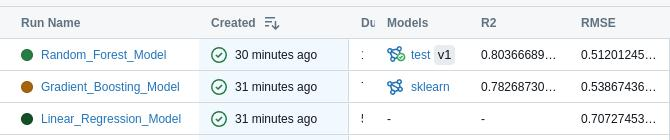



---

### Mission 3 : Analyse des features
- **Objectif** : Comprendre l’impact des variables sur les prédictions.
- **Tâches** :
  1. Calculer les importances globales des features (à l’aide de SHAP ou des features importances).
  2. Analyser l’impact local pour des exemples individuels (à l’aide de SHAP).
  3. Documenter vos conclusions.





Voir le fichier [Analyse_meilleur_modele.ipynb](https://github.com/Canthey/Projet_mlops/blob/main/analyse_meilleiur_modele.ipynb)

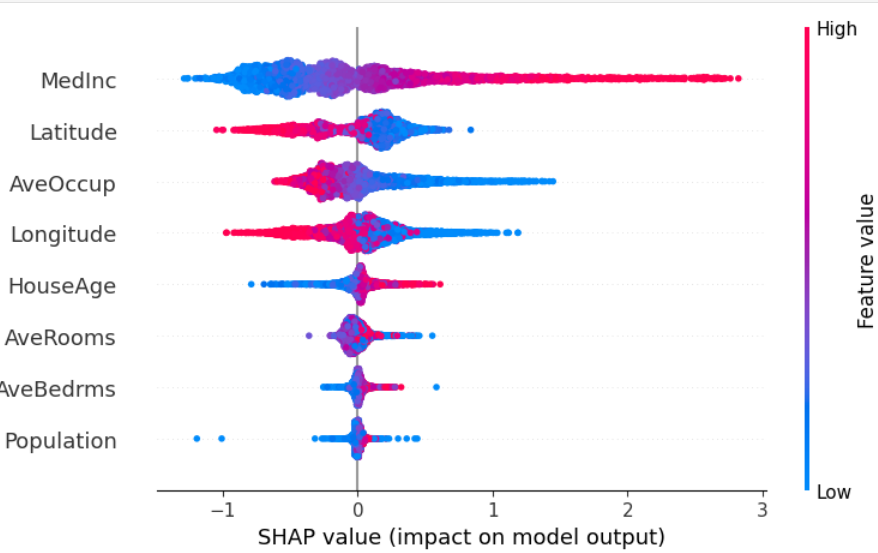




Voici un résumé des variables et leur impact selon le graphique SHAP :

* MedInc (Median Income) : La variable la plus influente. Des revenus médians élevés (rouge) augmentent les prédictions du modèle, ce qui peut indiquer une association avec des zones plus riches.
* Latitude et Longitude : Ces coordonnées géographiques influencent les prédictions en fonction de la localisation. Par exemple, une latitude élevée (rouge) tend à diminuer les valeurs prédites.
* AveOccup (Average Occupants) : Le nombre moyen d'occupants par logement montre un impact mixte selon les valeurs, reflétant une relation complexe.
* HouseAge (Âge des maisons) : Les maisons plus anciennes (bleu) semblent diminuer les prédictions, tandis que des maisons récentes (rouge) les augmentent.
* Population, AveRooms, AveBedrms : Moins influentes, mais des valeurs spécifiques peuvent légèrement modifier les prédictions (par exemple, plus de chambres = impact positif modéré).

---
### Mission 4 : Mise en production
- **Objectif** : Exposer le modèle via une API.
- **Tâches** :
  1. Créer une API avec FastAPI pour recevoir des données en entrée et renvoyer une prédiction.
  2. Conteneuriser l’API avec Docker.
  3. Déployer l’API sur une plateforme cloud gratuite (Optionnel).
  4. Créer une interface utilisateur locale avec Streamlit pour tester l’API.



---

### Mission 5 : Approche MLOps avancée
- **Objectif** : Implémenter les bonnes pratiques MLOps.
- **Tâches** :
  1. Configurer Git pour la gestion du code.
  2. Utiliser GitHub Actions pour mettre en place un pipeline CI/CD :
     - Tests unitaires (Pytest ou Unittest).
     - Build et déploiement automatisé de l’API.
  3. Tester le serving du modèle via MLflow.



---

### Mission 6 : Suivi en production
- **Objectif** : Surveiller les performances et détecter le drift.
- **Tâches** :
  1. Simuler des données en production.
  2. Utiliser *Evidently* pour détecter un éventuel data drift.
  3. Générer un rapport HTML pour analyser les écarts entre les données d’entérâinement et de production.
  4. Proposer des solutions pour réentraîner le modèle en cas de drift significatif.



les p-value < 0.05 signifie qu'il y a moins de 5% de chances que la différence observée entre les données soit due au hasard.
Cela indique que la distribution des données de production diffère significativement de celle des données d'entraînement pour la caractéristique analysée.
Conséquences :

Un tel drift peut entraîner une dégradation des performances du modèle, car celui-ci a été entraîné sur une distribution différente.
Cela peut refléter un changement dans les données sources ou des erreurs dans le pipeline de données.


### Solutions potentielles
Si le drift est significatif et impacte le modèle :

Collectez des données supplémentaires provenant des nouvelles distributions.
Réentraînez le modèle en utilisant un ensemble de données qui inclut les données de production.
Mettre à jour les seuils ou le pipeline de données.

---

## Livrables attendus
1. Code source documenté sur GitHub.
2. Rapport d’analyse exploratoire.
3. Enregistrement des modèles et expérimentations dans MLflow.
4. API déployée sur le cloud avec documentation.
5. Interface Streamlit pour tester l’API.
6. Rapport HTML d’analyse du drift avec Evidently.



In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

In [ ]:
housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing.target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847
